In [18]:
import numpy as np
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [19]:
df=pd.read_csv('Restaurant_Reviews (1).tsv',delimiter='\t',quoting=3)

In [20]:
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [21]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sriyo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
corpus=[]
for i in range(0,1000):
    review=re.sub(pattern='[^a-zA-Z]',repl=' ',string=df['Review'][i])
    review=review.lower()
    review_words=review.split()
    review_words=[word for word in review_words if not word in set(stopwords.words('english'))]
    ps=PorterStemmer()
    review=[ps.stem(word) for word in review_words]
    review=' '.join(review)
    corpus.append(review)

In [28]:
from sklearn.feature_extraction.text import CountVectorizer 
cv=CountVectorizer(max_features=1500)
x=cv.fit_transform(corpus).toarray()
y=df.iloc[:,1].values

In [29]:
from sklearn.model_selection import train_test_split
x_tr,x_test,y_tr,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [30]:
x_tr.shape,x_test.shape,y_tr.shape,y_test.shape

((800, 1500), (200, 1500), (800,), (200,))

In [31]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
classifier.fit(x_tr,y_tr)

MultinomialNB()

In [32]:
y_pred=classifier.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1], dtype=int64)

In [35]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

score1=accuracy_score(y_test,y_pred)
score2=precision_score(y_test,y_pred)
score3=recall_score(y_test,y_pred)

print("Accuracy score :",round(score1*100,2))
print("Precision score :",round(score2*100,2))
print("Recall score :",round(score3*100,2))


Accuracy score : 76.5
Precision score : 76.42
Recall score : 78.64


In [36]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

Text(95.72222222222221, 0.5, 'ctual values')

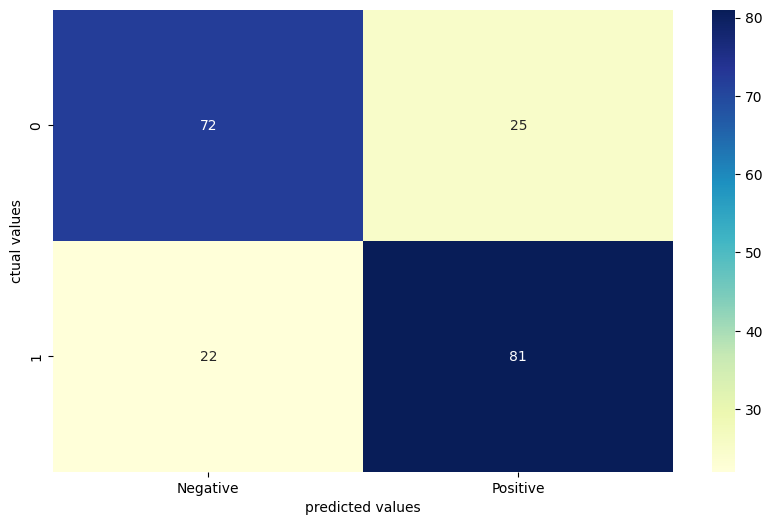

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,cmap='YlGnBu', xticklabels=['Negative','Positive'])
plt.xlabel("predicted values")
plt.ylabel("ctual values")

In [40]:
best_accuracy=0.0
alpha_val=0.0
for i in np.arange(0.1,1.1,0.1):
    temp_classifier=MultinomialNB(alpha=i)
    temp_classifier.fit(x_tr,y_tr)
    tempy_pred=temp_classifier.predict(x_test)
    score=accuracy_score(y_test,tempy_pred)
    print("Accuracy score is", round(i,1),round(score*100,2))
    if score>best_accuracy:
        best_accuracy=score 
        alpha_val=i 
print("Best accuracy :",round(best_accuracy))

Accuracy score is 0.1 78.0
Accuracy score is 0.2 78.5
Accuracy score is 0.3 78.0
Accuracy score is 0.4 78.0
Accuracy score is 0.5 77.5
Accuracy score is 0.6 77.5
Accuracy score is 0.7 77.5
Accuracy score is 0.8 77.0
Accuracy score is 0.9 76.5
Accuracy score is 1.0 76.5
Best accuracy : 1


In [41]:
classifier=MultinomialNB(alpha=0.2)
classifier.fit(x_tr,y_tr)

MultinomialNB(alpha=0.2)

In [42]:
def predict_sentiment(Sample_review):
    Sample_review=re.sub(pattern='[^a-zA-Z]',repl=' ',string=Sample_review)
    Sample_review=Sample_review.lower()
    Sample_review_words=Sample_review.split()
    Sample_review_words=[word for word in Sample_review_words if not word in set(stopwords.words('english'))]
    ps=PorterStemmer()
    final_review=[ps.stem(word) for word in Sample_review_words]
    final_review=' '.join(final_review)
    temp=cv.transform([final_review]).toarray()
    return classifier.predict(temp)


In [61]:
sample="The food is horrible"
if predict_sentiment(sample):
    print('+')
else:
    print('-')

-


In [63]:
sample="The desserts are ymumm"
if predict_sentiment(sample):
    print('+')
else:
    print('-')

+


In [64]:
sample="The serving could be better"
if predict_sentiment(sample):
    print('+')
else:
    print('-')

-
